今回から**古典統計学(classical statistics)**をやっていきます。古典統計学は代表的な統計学者の名を取って**ネイマン・ピアソン理論(Neyman Pearson theory)**とも呼ばれます。

# 母集団と標本

統計学とは様々な対象からなる**集団**の姿を調べる事を目的とする学問です。例えば、日本人の年齢の分布であるとか、製品に占める不良品の割合であるとか、Twitterユーザーの職業の分布であるとかそういったものです。調査の対象とする対象全体を**母集団(population)**と呼びます。母集団の対象全てを調べあげる事を**全数調査(complete survey)**と呼びます。多くの場合全数調査は困難であったり不可能であったりするので、ランダムに抽出した対象に対する調査を行い、母集団の姿を推測するという事が行われます。この抽出された対象を**標本(sample)**と呼び、標本の集合に対する調査を**標本調査(sample survey)**と呼びます。例えば、アンケート調査等がこれに該当するでしょう。

標本集合に対する調査は**標本平均(sample mean)**や**標本分散(sample variance)**等の**要約統計量(description statistics)**を求める事によって行います。そして、これらの統計量を元にして母集団に対する様々な推定を行います。

標本調査においては標本の抽出の仕方が非常に重要です。偏ったサンプリングを行うと、母集団の様子を正確に推測する事が出来なくなってしまいます。
母集団の様子を正確に調べる為には、**無作為抽出(random sampling)**を行う事が必要です。つまり、母集団の対象を全て等しい確率で選ばなければなりません。

<img src="http://nineties.github.io/prml-seminar/fig/statistics.png" alt="母集団と標本" width="500" />


# 標本に対する統計量
母集団から無作為抽出された標本 $x_1,x_2,\ldots,x_n$ について

$$ \overline{x} = \frac{1}{n}\sum_{i=1}^n x_i = \frac{x_1 + \cdots + x_n}{n}$$

を**標本平均(sample mean)**、

$$ s^2 = \frac{1}{n}\sum_{i=1}^n (x_i-\overline{x})^2 = \frac{(x_1-\overline{x})^2 + \cdots + (x_n-\overline{x})^2}{n}$$

を**標本分散(sample variance)**と呼びます。また

$$ u^2 = \frac{1}{n-1}\sum_{i=1}^n(x_i-\overline{x})^2 = \frac{(x_1-\overline{x})^2 + \cdots + (x_n-\overline{x})^2}{n-1}$$

を**不偏分散(unbiased variance)**と呼びます。numpyではそれぞれ以下のようにして計算する事が出来ます。

x = array([1.1, 2.9, 3.4, 2.0, 2.1, 3.8, 2.6, 3.2, 3.6, 2.3])
print (u'標本平均:',x.mean())
print (u'標本分散:',x.var())
print (u'不偏分散:',x.var(ddof=1))

In [2]:
x = array([1.1, 2.9, 3.4, 2.0, 2.1, 3.8, 2.6, 3.2, 3.6, 2.3])
print (u'標本平均:',x.mean())
print (u'標本分散:',x.var())
print (u'不偏分散:',x.var(ddof=1))

標本平均: 2.7
標本分散: 0.638
不偏分散: 0.708888888889


# 母数の推定
母集団の特徴量(平均や分散など)を**母数(parameter)**と呼びます。母数の推定は統計学における主要なタスクの１つです。
母数の推定には大きく分けて**点推定(point estimation)**と**区間推定(interval estimation)**という２つの方法があります。

点推定では

- 母数 $\theta$ の推定値は $\hat{\theta}$ である

という形で母数をある１つの値で推定します。今のように、母数 $\theta$ の値をサンプリングによって推定した値を通常 $\hat{\theta}$と書きます。

区間推定では

- 母数 $\theta$ は～%の確率で $a\leq \theta\leq b$ の範囲にある

という形で、母数の存在する区間を推定します。詳しい方法については次回以降説明していきます。

# 尤度

母数 $\theta$ の離散的な確率分布 $P(\mathbf{x}|\theta)$ から独立にサンプリングを行ったらデータ列 $D = \{\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_n\}$ が観測されたとしましょう。このデータ列 $D$ が観測される確率は

$$ P(D|\theta) = \prod_{i=1}^nP(\mathbf{x}_i|\theta)$$

となります。これを $\theta$ の関数とみなした物を **尤度関数(likelihood function)** と呼び

$$ \mathrm{L}(\theta|D) = P(D|\theta)$$

と書きます。連続確率分布 $\pi(\mathbf{x}|\theta)$ に対しても同様に

$$ \mathrm{L}(\theta|D)=\pi(D|\theta) = \prod_{i=1}^n\pi(\mathbf{x}_i|\theta)$$

と定義されます。尤度関数の値を **尤度(likelihood)** と呼びます。また、尤度関数の対数を取った物を**対数尤度関数(log-likelihood function)**と呼びます。

$$ \log\mathrm{L}(\theta|D)$$

対数を取ると掛け算が足し算に変わる為いろいろと都合がよいです。

## 例
表の出る確率が $p$ のコインを $5$ 回投げたらデータ $D=\{\text{表},\text{裏},\text{裏},\text{表},\text{表}\}$ が得られたとします。この時の尤度関数は

$$ \mathrm{L}(p|D) = p\times (1-p) \times (1-p) \times p \times p = p^3(1-p)^2 $$

となります。すると尤度の値は $p=3/5$ となります。つまり、$p=3/5$ の時にデータ $D$ が出現する確率が最大となります。

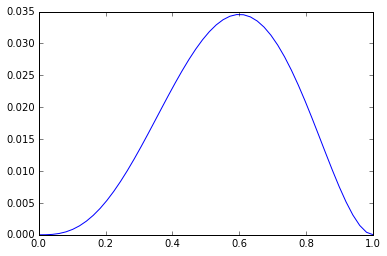

In [3]:
x = linspace(0,1)
plot(x, x**3 * (1-x)**2)

## 例

平均が $\mu$, 分散が $\sigma^2$ の正規分布からサンプリングを行ったらデータ $D=\{x_1,\ldots,x_n\}$ が得られたとします。この時

$$ \log \pi(x_i|\mu,\sigma^2) = \log\left[\frac{1}{\sqrt{2\pi\sigma^2}}
\exp\left\{-\frac{(x_i-\mu)^2}{2\sigma^2}\right\}\right]=-\frac{(x_i-\mu)^2}{2\sigma^2} -\frac{1}{2}\log 2\pi\sigma^2$$

なので、対数尤度は

$$ \log\mathrm{L}(\mu,\sigma^2|D)=\log\prod_{i=1}^n \pi(x_i|\mu,\sigma^2)=\sum_{i=1}^n\log \pi(x_i|\mu,\sigma^2) = -\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2 - \frac{n}{2}\log 2\pi\sigma^2$$

となります。